In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib


import sys
sys.path.append("../src")

import feature_engineering as fe
import data_preprocessing as dp
import random_forest_train as rft

importlib.reload(dp)
from data_preprocessing import TennisPreprocessor

importlib.reload(rft) 
from random_forest_train import RandomForest

In [2]:
path_to_df = "../data/raw/atp_tennis.csv"
path_to_df_processed = "../data/processed/atp_tennis_processed.csv"

df = pd.read_csv(path_to_df)
df_processed = df.copy()

In [3]:
df_processed = fe.process_features(df_processed)

In [ ]:
preprocessor = TennisPreprocessor(cutoff_date="2024-01-01")
df_processed, X_train, y_train, X_test, y_test = preprocessor.fit_transform(df_processed)


=== FIT & TRANSFORM PREPROCESSOR ===
✅ Preprocessor saved to ../data/labels/preprocessor.pkl


In [5]:
print("\n" + "=" * 70)
print("FEATURE ANALYSIS - OUTLIER DETECTION")
print("=" * 70)

# Converti X_train in DataFrame per analizzare meglio
# (Salva i nomi delle colonne prima dello scaling)
# Supponendo che tu abbia ancora accesso a X_train prima dello scaling

# Analizza il range per ogni feature
for i in range(X_train.shape[1]):
    col_min = X_train[:, i].min()
    col_max = X_train[:, i].max()
    col_mean = X_train[:, i].mean()
    col_std = X_train[:, i].std()
    
    # Segnala colonne con valori estremi
    if abs(col_min) > 10 or abs(col_max) > 10:
        print(f"⚠️  Feature {i}: min={col_min:.2f}, max={col_max:.2f}, mean={col_mean:.2f}, std={col_std:.2f}")

# Conta quanti valori sono oltre ±5 std
extreme_values = np.sum((X_train < -5) | (X_train > 5))
total_values = X_train.size
print(f"\n📊 Extreme values (|z| > 5): {extreme_values} / {total_values} ({extreme_values/total_values*100:.2f}%)")


print("=" * 70)
print("DATA VERIFICATION")
print("=" * 70)
print(f"X_train type: {type(X_train)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_train range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"\ny_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train unique values: {np.unique(y_train)}")
print(f"y_train distribution: {np.bincount(y_train)}")
print(f"\nX_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_test distribution: {np.bincount(y_test)}")


FEATURE ANALYSIS - OUTLIER DETECTION
⚠️  Feature 8: min=-0.76, max=32.86, mean=-0.00, std=1.00
⚠️  Feature 9: min=-0.75, max=47.66, mean=0.00, std=1.00
⚠️  Feature 12: min=-1.27, max=24.17, mean=0.00, std=1.00
⚠️  Feature 13: min=-1.29, max=18.51, mean=0.00, std=1.00
⚠️  Feature 14: min=-35.51, max=24.44, mean=0.00, std=1.00
⚠️  Feature 16: min=-12.43, max=16.41, mean=-0.00, std=1.00
⚠️  Feature 17: min=-0.41, max=19.05, mean=0.00, std=1.00
⚠️  Feature 18: min=-0.41, max=19.54, mean=-0.00, std=1.00
⚠️  Feature 19: min=-12.42, max=12.43, mean=0.00, std=1.00
⚠️  Feature 45: min=-0.51, max=15.02, mean=-0.00, std=1.00
⚠️  Feature 47: min=-0.61, max=12.50, mean=-0.00, std=1.00
⚠️  Feature 49: min=-0.51, max=14.42, mean=0.00, std=1.00
⚠️  Feature 51: min=-0.61, max=12.50, mean=-0.00, std=1.00
⚠️  Feature 54: min=-10.43, max=10.63, mean=0.00, std=1.00
⚠️  Feature 55: min=-0.23, max=73.81, mean=-0.00, std=1.00
⚠️  Feature 56: min=-0.23, max=66.08, mean=-0.00, std=1.00
⚠️  Feature 57: min=-50.

In [6]:
# Define numeric columns

numeric_cols = df_processed.select_dtypes(include=np.number).columns

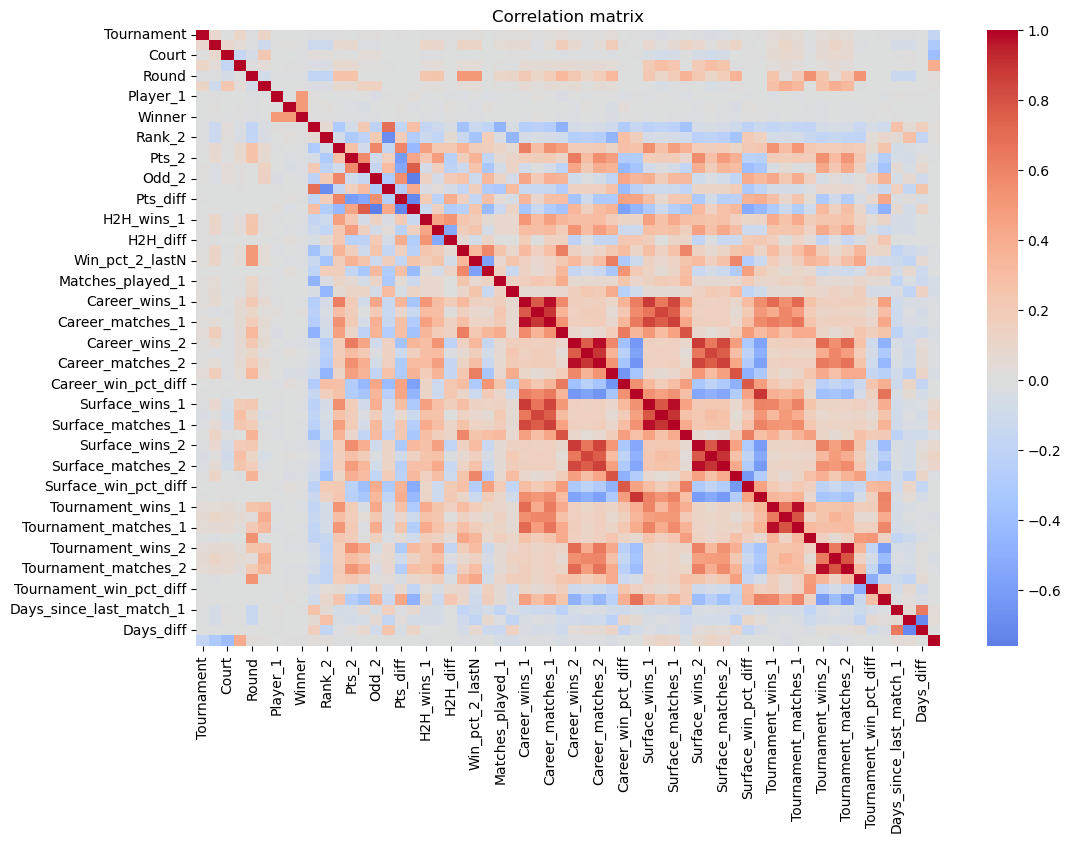

In [7]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()

In [8]:
df_processed.to_csv(path_to_df_processed, index=False)

In [10]:
random_forest = RandomForest(X_train, y_train, X_test, y_test)
metrics = random_forest.run_full_pipeline(
    run_cv=True, 
    plot_results=True,
    save_plot_path='../results/tennis_rf_results.png'
)

random_forest.save_model('../models/tennis_rf_model.pkl')

print(f"\n🎾 Final Test Accuracy: {metrics['test_accuracy']*100:.2f}%")


✓ Converted numpy arrays to DataFrames with 59 features
✓ Data validation completed successfully

DATA INFORMATION
Training Set:
  Samples:                61562
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   30781 (50.00%)
    Class 1 (Player 1):   30781 (50.00%)

Test Set:
  Samples:                4717
  Features:               59
  Class Distribution:
    Class 0 (Player 2):   2358 (49.99%)
    Class 1 (Player 1):   2359 (50.01%)

Total Samples:            66279
Train/Test Split:         92.88% / 7.12%

✓ Model built successfully

TRAINING MODEL
Training Bagging Random Forest model...
✓ Training completed!

✓ Predictions generated

PERFORMANCE METRICS

1. ACCURACY METRICS
----------------------------------------------------------------------
Training Accuracy:        0.8596 (85.96%)
Test Accuracy:            0.6818 (68.18%)
Out-of-Bag (OOB) Score:   0.7085 (70.85%)
Overfitting Gap:          0.1778

2. PRECISION, RECALL, F1-SCORE
------------------------